# Lab 1: PyTorch basic practice

1. import the required libraries

In [2]:
import os
import cv2
import torch
import glob
import numpy as np

2. Read in the images (1.png, 2.png, 3.png, 4.png) in the current directory and save them to a list (so the length of this list is 4). Each element in this list is a numpy array (an image). All the images have the same shape (height, width, channel), which is (555, 695, 3) in this lab.

In [3]:
path_image = 'E:/project_py_web/FREELANCER/Basic Pytorch _/image/' # replace this variable with ur own path of image 

img_list = [] # a list used to save all the images in the current directory
for img in os.listdir(path_image):
    try :
        image= cv2.imread(path_image+img)
        img_list.append(image)
    except :
        pass

In [4]:
# find out the total images stored in list_image
print("Total Image :",len(img_list))

Total Image : 4


3. Convert "img_list" to a 4-D tensor "img_tensor".The shape of this tensor is (b,c,h,w). Where b: batch size, which is 4 in this lab :

    - c: the number of channels. Since they are all color images, it is 3.
    
    - h: the height of each image. 555
    
    - w: the width of each image. 695

In [5]:
# load new library for transform 3D image shape to 4D tensor shape
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
# using dataloader function we generate 4D tensor include batch_size from img_list (array of original image has 3D shape)
img_tensor = DataLoader(img_list, batch_size = 4, shuffle=False)

In [7]:
# check value of our tensor is 4D like mentioned / not
tensor = next(iter(img_tensor))

In [8]:
# check the total dimensions of the tensor
tensor.shape

torch.Size([4, 555, 695, 3])

4. Split the 4-D tensor "img_tensor" into three new 4-D tensors based on the blue, green and red channels of the image, and name them "blue_tensor", "green_tensor" and "red_tensor" (because OpenCV chooses BGR color format )

In [101]:
# separates the tensor into 3 variables with the specified RGB . value
red_tensor   = next(iter(img_tensor))[:,:,:,:1]
green_tensor = next(iter(img_tensor))[:,:,:,1:2]
blue_tensor  = next(iter(img_tensor))[:,:,:,2:3]

5. For every image, increase each pixel value of the green channel by 40, increase each pixel value of the blue channel by 10, and decrease each pixel value of the red channel by 20. This operation should be performed directly on the three tensors (blue_tensor, green_tensor, red_tensor)

In [67]:
# increase pixel value each variable
red_tensor -= 20
green_tensor += 40
blue_tensor += 10

6. Combine/Merge these three revised tensors (green_tensor, blue_tensor, red_tensor) into a new one and convert it into a numpy array that can be visualized by OpenCV. Plot these new 4 images.

Please note that the order of the color format is blue, green and red. And the shape of an image（numpy array）that can be visualized is （height, width, channel) :

    - To convert a tensor to a numpy array, you can use x.numpy(), where x is a tensor.
    
    - Google colab crashes if you try to display image using cv2.imshow() ,instead import from google.colab.patches import cv2_imshow and display using cv2_imshow()

In [145]:
# import library for visualize final image
import matplotlib.pyplot as plt

In [144]:
# merge tensor from (4, 555, 695) become (4, 555, 695, 1, 3), we saw some different but we try reshape
# (batch, width, height, n*RGB_value), final shape is (4, 555, 695, 3)~
final = torch.stack([blue_tensor, green_tensor, red_tensor], dim=3).reshape(4, 555, 695, 3*1).numpy()

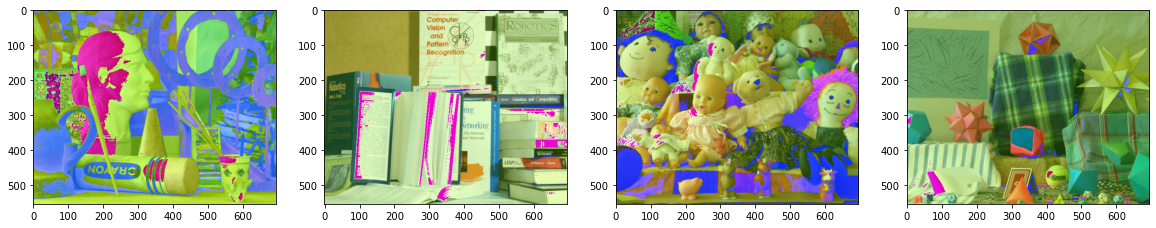

In [151]:
# generate each image in 1 figure using matplotlib
x = 0
fig = plt.figure(figsize=(20, 15))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    img = final[x]
    x += 1
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Submit for Client :
    
    - Final File .ipynb
    
    - PDF Version using https://htmtopdf.herokuapp.com/ipynbviewer/
    
    - Each Step Code Explanation in .txt file